## 红黑树的五个性质

1. 每个结点或是红色的，或是黑色的。
2. 根结点是黑色的。
3. 每个叶结点(NIL)是黑色的。
4. 如果一个结点是红色的，则它的两个子结点都是黑色的。
5. 对每个结点，从该结点到其所有后代叶结点的简单路径上，均包含相同数目的黑色结点。

## 哨兵

为便于处理红黑树代码中的边界条件，使用一个哨兵T.nil代替所有的NIL(所有的叶结点和根结点的父结点)，其color属性为BLACK。带哨兵的红黑树如下图所示。

<img src="22EE0EEABD0C3A0731C70881B39D8C4C.jpg" width="500px">

## 黑高

从某个结点x出发(不含该结点)到达一个叶结点的任意一条简单路径上的黑色结点个数称为该节点的黑高，记为bh(x)。

定义红黑树的黑高为其根结点的黑高。一棵有n个内部结点的红黑树高度至多为2lg(n+1)。

## 旋转

旋转是能保持二叉搜索树性质的搜索树局部操作，包括左旋和右旋。该操作仅改变指针结构。**时间复杂度O(1)**。

<img src="E2B4D916-510C-4A79-A3CD-6EBAD791E277.png" width="400px"/>

<div style="width: 200px;height: 1px;float: left"></div>
<img src="20170323102237896.gif" width="300px" style="float: left" />
<img src="20170323102309404.gif" width="300px" style="float: left" />

In [13]:
def left_rotate(T, x):
    y = x.right
    x.right = y.left
    if y.left != T.nil:
        y.left.p = x
    y.p = x.p
    if x.p == T.nil:
        T.root = y
    elif x == x.p.left:
        x.p.left = y
    else:
        x.p.right = y
    y.left = x
    x.p = y

def right_rotate(T, y):
    x = y.left
    y.left = x.right
    if x.right != T.nil:
        x.right.p = y
    x.p = y.p
    if y.p == T.nil:
        T.root = x
    elif y == y.p.left:
        y.p.left = x
    else:
        y.p.right = x
    x.right = y
    y.p = x

## 插入

**时间复杂度O(lgn)**，普通的二叉搜索树插入过程，标记z为红色。为保持红黑性质，调用辅助过程RB-INSERT-FIXUP来对结点重新着色并旋转。

In [2]:
def rb_insert(T, z):
    y = T.nil
    x = T.root
    while x != T.nil:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            x = x.right
    z.p = y
    if y == T.nil:
        T.root = z
    elif z.key < y.key:
        y.left = z
    else:
        y.right = z
    z.left = T.nil
    z.right = T.nil
    z.color = 'RED'
    rb_insert_fixup(T, z)

### RB-INSERT-FIXUP过程

因为z是红结点，如果z是根结点，则破坏了性质2；若z的父结点是红结点，则破坏了性质4。

**情况1：z的叔结点y是红色的**：将z.p和y着为黑色，将z.p.p着为红色，指针z指向z.p.p。

<img src="C2B6EEAB-D017-444E-BC5A-71F6B3CEC4CA.png" width="500px" />

**情况2：z的叔结点y是黑色的，且z是一个右孩子**：用左旋将情况2变为情况3(由于z和z.p都是红色的，旋转对结点的黑高和性质5都无影响)。

**情况3：z的叔结点y是黑色的，且z是一个左孩子**：改变y.p和y.p.p的颜色并做右旋。

<img src="5159A912-55F8-4466-82A2-FC8335552D56.png" width="500px" />

**RB-INSERT-FIXUP过程时间复杂度O(lgn)**：仅当情况1发生时，指针z沿树上升2层，while循环重复执行，while循环被执行的总次数为O(lgn)，所以RB-INSERT-FIXUP过程的时间复杂度为O(lgn)。此外，RB-INSERT-FIXUP过程最多调用两次旋转操作，因为只要执行了情况2或情况3就会退出循环。

In [73]:
def rb_insert_fixup(T, z):
    while z.p.color == 'RED':
        if z.p == z.p.p.left:
            y = z.p.p.right
            if y.color == 'RED':
                z.p.color = 'BLACK'
                z.p.p.color = 'RED'
                y.color = 'BLACK'
                z = z.p.p
            else:
                if z == z.p.right:
                    z = z.p
                    left_rotate(T, z)
                z.p.color = 'BLACK'
                z.p.p.color = 'RED'
                right_rotate(T, z.p.p)
        else:
            y = z.p.p.left
            if y.color == 'RED':
                z.p.color = 'BLACK'
                z.p.p.color = 'RED'
                y.color = 'BLACK'
                z = z.p.p
            else:
                if z == z.p.left:
                    z = z.p
                    right_rotate(T, z)
                z.p.color = 'BLACK'
                z.p.p.color = 'RED'
                left_rotate(T, z.p.p)
    T.root.color = 'BLACK'

RB-INSERT-FIXUP过程例子：

<img src="D44825C4-4FF1-4BA3-BDC6-E0DEEF1E2D94.png" width="500px" />

## 删除

**时间复杂度O(lgn)**。类似于二叉搜索树的删除操作，需要一个嫁接子树的辅助过程TRANSPLANT。

In [4]:
def rb_transplant(T, u, v):
    if u.p == T.nil:         # diffent 1: if u.p == NIL
        T.root = v
    elif u == u.p.left:
        u.p.left = v
    else:
        u.p.right = v
    v.p = u.p                # diffrent 2: if v != NIL: v.p = u.p

过程RB-DELETE与TREE-DELETE类似。由于y和x可能引起红黑树性质的破坏，必须记住y的颜色以及x的踪迹。

最后如果结点y是黑色，就有可能引入了一个或多个红黑性质破坏的情况，调用RB-DELETE-FIXUP过程改变颜色和执行旋转来恢复红黑性质。

In [5]:
def tree_minimum(T, x):
    while x.left != T.nil:
        x = x.left
    return x

def rb_delete(T, z):
    y = z
    y_original_color = y.color
    if z.left == T.nil:
        x = z.right
        rb_transplant(T, z, z.right)
    elif z.right == T.nil:
        x = z.left
        rb_transplant(T, z, z.left)
    else:
        y = tree_minimum(T, z.right)
        y_original_color = y.color
        x = y.right
        if y.p == z:
            x.p = y
        else:
            rb_transplant(T, y, y.right)
            y.right = z.right
            y.right.p = y
        rb_transplant(T, z, y)
        y.left = z.left
        y.left.p = y
        y.color = z.color
    if y_original_color == 'BLACK':
        rb_delete_fixup(T, x)

如果y是红色的，当y被删除或移动时，红黑性质依然保持，原因如下：

1. 树的黑高没有变化。
2. 不存在两个相邻的红结点。如果y是z的右孩子，x为y的原右孩子，且y为红色，那么z和x一定为黑色，y替代z的位置并更改为黑色，不可能有两个红结点相邻；如果y不是z的右孩子，则y的原右孩子x一定为黑色，y的原父结点一定为黑色，x替代y的位置也不可能有两个红结点相邻。
3. 如果y是红色的，就不可能是根节点，所以根节点依然是黑色。

如果y是黑色的，则会产生三个问题：

1. 如果y是原来的根结点，而y的一个红孩子成为新的根结点，则违反性质2。
2. 如果x和x.p是红色的，则违反了性质4.
3. 在树中移动y将导致先前包含y的任何简单路径上黑结点个数少1，因此y的任何祖先都不满足性质5。

改正问题3的办法是将现在占有y的位置的结点x视为还有一重额外的黑色，即将任意包含结点x的简单路径上黑结点个数加1，在这种假设下性质5成立。当黑结点y删除或移动时，将其黑色“下推”给结点x。于是问题变为结点x可能既不是红色，又不是黑色，从而违反性质1。现在的节点x是双重黑色或红黑色，这就分别给包含x的简单路径上黑结点数贡献了2和1，x的color属性仍然以RED(红黑色)和BLACK(双重黑色)表示。

注意：加黑的结点color属性为BLACK，深阴影的结点color属性为RED，浅阴影的结点color属性用c和c'表示，它既可以为RED也可以为BLACK。

**情况1：x的兄弟结点w是红色的**：改变w和x.p的颜色，对x.p做左旋，将情况1转换为情况2、3或4处理。

<img src="74BE07771AF688000CB4D6F628DB8A94.jpg" width="600px" />

**情况2：x的兄弟结点w是黑色的，而且w的两个子结点都是黑色的**：因为w和其两个子结点都是黑色的，所以从x和w上去掉一重黑色，使得x只有一重黑色而w为红色。为了补偿从x和w中去掉的一重黑色，在原来是红色或黑色的x.p上新增一重额外的黑色。通过将x.p作为新结点x来重复while循环。注意到，如果通过情况1进入情况2，则新结点x是红黑色的，因为原来的x.p是红色的，因此新结点的color为RED，将会终止while循环，然后将新结点x着为单重黑色。

<img src="F50B0BFAD3502CE1B1FACF5736D16A96.jpg" width="600px" />

**情况3：x的兄弟结点w是黑色的，w的左孩子是红色的，w的右孩子是黑色的**：交换w和其左孩子的颜色，然后对w进行右旋，将情况3转换成情况4。

<img src="C32A73692705EE2EEEC36EF2D721DD3F.jpg" width="600px" />

**情况4：x的兄弟结点w是黑色的，且w的右孩子是红色的**：改变w.color=x.p.color、x.p.color=BLACK、w.right.color=BLACK的颜色，然后对x.p做左旋，可以去掉x的额外黑色，从而使它变为单重黑色，而且不破坏红黑树的任何性质。最后将x设置为根后，循环终止。

<img src="0A545BC30CF18340507BD0BA5E3A110E.jpg" width="600px" />

In [6]:
def rb_delete_fixup(T, x):
    while x != T.root and x.color == 'BLACK':
        if x == x.p.left:
            w = x.p.right
            # case 1
            if w.color == 'RED':
                w.color = 'BLACK'
                x.p = 'RED'
                left_rotate(T, x.p)
                w = x.p.right
            # case 2
            if w.left.color == 'BLACK' and w.right.color == 'BLACK':
                w.color = 'RED'
                x = x.p
            else:  
                # case 3
                if w.right.color == 'BLACK':
                    w.left.color = 'BLACK'
                    w.color = 'RED'
                    right_rotate(T, w)
                    w = x.p.right
                # case 4
                w.color = x.p.color
                x.p.color = 'BLACK'
                w.right.color = 'BLACK'
                left_rotate(T, x.p)
                x = T.root
        else:
            w = x.p.left
            # case 1
            if w.color == 'RED':
                w.color = 'BLACK'
                x.p = 'RED'
                right_rotate(T, x.p)
                w = x.p.left
            # case 2
            if w.left.color == 'BLACK' and w.right.color == 'BLACK':
                w.color = 'RED'
                x = x.p
            else:
                # case 3
                if w.left.color == 'BLACK':
                    w.right.color = 'BLACK'
                    w.color = 'RED'
                    left_rotate(T, w)
                    w = x.p.left
                # case 4
                w.color = x.p.color
                x.p.color = 'BLACK'
                w.left.color = 'BLACK'
                right_rotate(T, x.p)
                x = T.root
    x.color = 'BLACK'

**RB-DELETE的时间复杂度为O(lgn)**。不调用RB-DELETE-FIXUP过程的时间复杂度为O(lgn)。在RB-DELETE-FIXUP中，情况1、3和4在各执行常数次颜色改变和至多3次旋转后终止，情况2是while循环可以重复执行的唯一情况，指针x沿树上升至多O(lgn)次，且不执行任何旋转。所以过程RB-DELETE-FIXUP花费O(lgn)的时间，做至多3次旋转，因此RB-DELETE总的时间复杂度为O(lgn)。

In [9]:
class NILNode:
    def __init__(self):
        self.key = None
        self.value = None
        self.left = None
        self.right = None
        self.p = None
        self.color = 'BLACK'

NIL = NILNode()
        
class Node:
    def __init__(self, key):
        self.key = key
        self.value = None
        self.left = NIL
        self.right = NIL
        self.p = NIL
        self.color = 'RED'

class RBTree:
    def __init__(self):
        self.nil = NIL
        self.root = self.nil

**其它基本操作**

In [87]:
def rb_inorder_walk(T, x):
    if x != T.nil:
        rb_inorder_walk(T, x.left)
        print x.key,
        rb_inorder_walk(T, x.right)

def rb_search(T, key):
    x = T.root
    while x != T.nil and x.key != key:
        if key < x.key:
            x = x.left
        else:
            x = x.right
    return x

def rb_tree_minimum(T):
    x = T.root
    while x.left != T.nil:
        x = x.left
    return x

def rb_tree_maximum(T):
    x = T.root
    while x.right != T.nil:
        x = x.right
    return x

def rb_successor(T, x):
    if x.right != T.nil:
        return rb_tree_minimum(T, x.right)
    y = x.p
    while y != T.nil and x == y.right:
        x = y
        y = y.p
    return y

def rb_predecessor(T, x):
    if x.left != T.nil:
        return rb_tree_maximum(T, x.left)
    y = x.p
    while y != T.nil and x == y.left:
        x = y
        y = y.p
    return y

def draw(T):
        if T.root == T.nil:
            return None
        
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.DiGraph()
        G.add_node(T.root.key)
        gfs = [T.root]
        while gfs:
            x = gfs.pop(0)
            if x.left != T.nil:
                G.add_node(x.left.key)
                G.add_edge(x.key, x.left.key)
                gfs.append(x.left)
            if x.right != T.nil:
                G.add_node(x.right.key)
                G.add_edge(x.key, x.right.key)
                gfs.append(x.right)
        
        colors = []
        for key in G.nodes():
            colors.append('RED' if rb_search(T, key).color == 'RED' else 'GRAY')
            
        nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color=colors)
        plt.show()

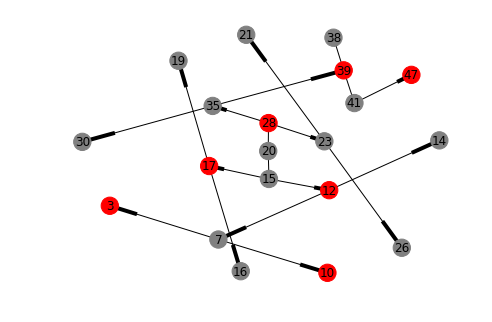

In [140]:
keys = [26, 23, 21, 20, 19, 17, 16, 15, 14, 12, 10, 7, 3, 28, 30, 35, 38, 39, 41, 47]
nodes = [Node(key) for key in keys]

# RB-INSERT
T = RBTree()
for node in nodes:
    rb_insert(T, node)
    
# RB-INORDER-WALK
# rb_inorder_walk(T, T.root)
    
# RB-SEARCH
# print rb_search(T, 17).key

# RB-TREE-MINIMUM
# print rb_tree_minimum(T).key

# RB-TREE-MAXIMUM
# print rb_tree_maximum(T).key

# RB-SUCCESSOR
# print rb_successor(T, nodes[keys.index(14)]).key

# RB-PREDECESSOR
# print rb_predecessor(T, nodes[keys.index(14)]).key
    
# RB-DELETE 
# rb_delete(T, nodes[0])

# DRAW
draw(T)

整理为下图：

<img src="E4F570D078325C223682DE707F421EF2.png" width="400px"/>